In [4]:
import os
import sys
current_directory = os.getcwd()
if not os.path.exists(current_directory + '\\experimental_data'):
    os.makedirs(current_directory + '\\experimental_data')
    os.makedirs(current_directory + '\\experimental_data\\plots')
    os.makedirs(current_directory + '\\experimental_data\\results')
sys.path.append(current_directory.replace('experiments', ''))
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.set_loglevel('WARNING')
from run import execute_simulation, create_experiment_snapshots, execute_ai_model
from mtdnetwork.mtd.completetopologyshuffle import CompleteTopologyShuffle
from mtdnetwork.mtd.ipshuffle import IPShuffle
from mtdnetwork.mtd.hosttopologyshuffle import HostTopologyShuffle
from mtdnetwork.mtd.portshuffle import PortShuffle
from mtdnetwork.mtd.osdiversity import OSDiversity
from mtdnetwork.mtd.servicediversity import ServiceDiversity
from mtdnetwork.mtd.usershuffle import UserShuffle
from mtdnetwork.mtd.osdiversityassignment import OSDiversityAssignment
import logging
import pandas as pd
import numpy as np

logging.basicConfig(format='%(message)s', level=logging.INFO)

In [7]:
create_experiment_snapshots([25, 50, 75, 100])

In [6]:
# Learning Parameters
epsilon = 1.0  # exploration rate

# Simulator Settings
start_time = 0
finish_time = 3000
mtd_interval = 100
scheme = 'mtd_ai'
total_nodes = 300
new_network = True


Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Static period: 0
Action: 0
Static period: 0
Action: 2
MTD: IPShuffle triggered 0.0s
Static period: 100.17665048754256
Action: 2
MTD: IPShuffle triggered 100.2s
MTD: Interrupted EXPLOIT_VULN at 112.3s!
Static period: 88.05239663282583
Action: 3
MTD: IPShuffle triggered 200.3s
Static period: 101.05892734695101
Action: 1
MTD: IPShuffle triggered 301.4s
MTD: Interrupted EXPLOIT_VULN at 310.4s!
Static period: 91.04394286493391
Action: 2
MTD: IPShuffle triggered 401.4s
Static period: 100.00198234042023
Action: 2
MTD: IPShuffle triggered 501.4s
MTD: Interrupted EXPLOIT_VULN at 512.3s!
Static period: 89.50071995387032
Action: 3
MTD: IPShuffle triggered 601.8s
Static period: 100.13578623298099
Action: 4
MTD: OSDiversity triggered 701.9s
MTD: Interrupted EXPLOIT_VULN at 713.0s!
Static period: 19.957959904117843
Action: 1
MTD: OSDiversity triggered

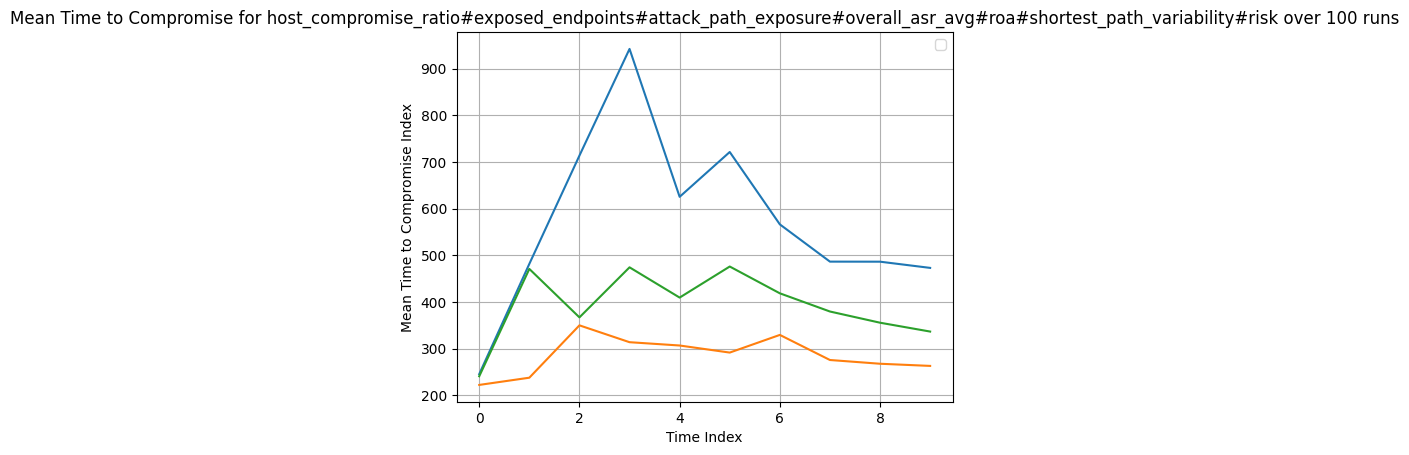

In [12]:
# Initialize an empty DataFrame
all_runs_df = pd.DataFrame()
features = ["host_compromise_ratio", "exposed_endpoints", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]
model = "main_network_final_host_compromise_ratio#exposed_endpoints#attack_path_exposure#overall_asr_avg#roa#shortest_path_variability#risk"
for run_index in range(1,101):
    
    evaluation = execute_ai_model(model=model, features=features, start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, new_network=new_network)
    eva = pd.DataFrame(evaluation.mean_time_to_compromise_10_timestamp(run_index))
    
    # Append the data to the all_runs_df DataFrame
    all_runs_df = pd.concat([all_runs_df, eva], axis=1)

# Filter columns that include "Mean Time to Compromise"
mean_time_columns = all_runs_df[all_runs_df.filter(like='Mean Time to Compromise').columns]
time_columns = all_runs_df[all_runs_df.filter(like='Time').columns]
# Find the max value of each row
all_runs_df['Max'] = mean_time_columns.max(axis=1)
# Find the min value of each row
all_runs_df['Min'] = mean_time_columns.min(axis=1)
# Find the median value of each row
all_runs_df['Median'] = mean_time_columns.median(axis=1)
# Calculate 75th percentile (top 25%) and 25th percentile (bottom 25%)
all_runs_df['75th Percentile'] = mean_time_columns.quantile(0.75, axis=1)
all_runs_df['25th Percentile'] = mean_time_columns.quantile(0.25, axis=1)

# Plot
plt.plot(all_runs_df['75th Percentile'])
plt.plot(all_runs_df['25th Percentile'])
plt.plot(all_runs_df['Median'])
plt.ylabel('Mean Time to Compromise Index') 
plt.xlabel('Time Index')
plt.title(f'Mean Time to Compromise for {"#".join(features)} over 100 runs')
plt.grid(True)
plt.legend()
plt.show()



Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Static period: 0
Action: 3
MTD: OSDiversity triggered 0.0s
Static period: 20.941901327349683
Action: 4
MTD: OSDiversity triggered 101.0s
Static period: 20.771105501118285
Action: 3
MTD: OSDiversity triggered 201.8s
Static period: 19.348721744071156
Action: 2
MTD: OSDiversity triggered 301.9s
Static period: 19.57441114374768
Action: 0
Static period: 19.57441114374768
Action: 4
MTD: ServiceDiversity triggered 402.1s
Static period: 29.733774247056374
Action: 1
MTD: ServiceDiversity triggered 502.2s
Static period: 30.112532651699894
Action: 1
MTD: ServiceDiversity triggered 602.5s
Static period: 30.715351046990236
Action: 2
MTD: ServiceDiversity triggered 703.3s
Static period: 29.797767164025572
Action: 1
MTD: CompleteTopologyShuffle triggered 803.3s
Static period: 101.22008050257853
Action: 4
MTD: CompleteTopologyShuffle triggered 904.6s
MT

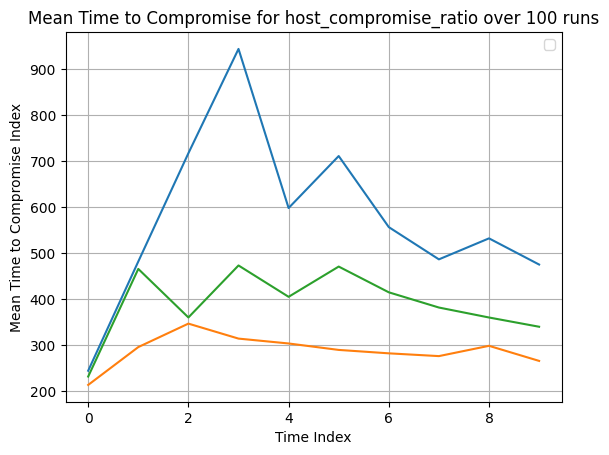

Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Static period: 0
Action: 3
MTD: OSDiversity triggered 0.0s
Static period: 20.139446705182067
Action: 0
Static period: 20.139446705182067
Action: 0
Static period: 20.139446705182067
Action: 4
MTD: OSDiversity triggered 100.1s
Static period: 19.472537374327885
Action: 3
MTD: OSDiversity triggered 200.3s
Static period: 18.936665909333954
Action: 1
MTD: OSDiversity triggered 300.3s
Static period: 20.08618398823012
Action: 1
MTD: CompleteTopologyShuffle triggered 400.7s
Static period: 100.19758944625227
Action: 1
MTD: CompleteTopologyShuffle triggered 500.9s
MTD: Interrupted EXPLOIT_VULN at 521.0s!
Static period: 80.73844734182694
Action: 0
Static period: 80.73844734182694
Action: 3
MTD: CompleteTopologyShuffle triggered 601.8s
Static period: 100.88746933347397
Action: 0
Static period: 100.88746933347397
Action: 4
MTD: CompleteTopologyShuffle

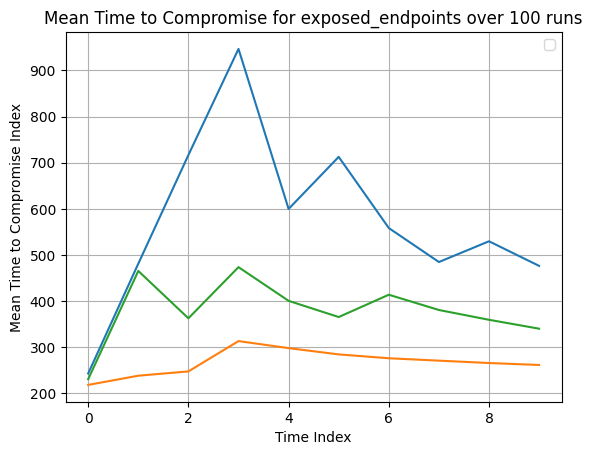

Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Static period: 0
Action: 1
MTD: CompleteTopologyShuffle triggered 0.0s
Static period: 100.98233396635159
Action: 4
MTD: CompleteTopologyShuffle triggered 101.0s
MTD: Interrupted EXPLOIT_VULN at 120.3s!
Static period: 81.07077563689258
Action: 3
MTD: CompleteTopologyShuffle triggered 201.3s
Static period: 100.18264479326939
Action: 4
MTD: CompleteTopologyShuffle triggered 301.5s
MTD: Interrupted EXPLOIT_VULN at 322.0s!
Static period: 80.42601164393693
Action: 3
MTD: CompleteTopologyShuffle triggered 402.5s
Static period: 100.24453011477988
Action: 1
MTD: CompleteTopologyShuffle triggered 502.7s
MTD: Interrupted EXPLOIT_VULN at 522.6s!
Static period: 80.14271437158664
Action: 4
MTD: CompleteTopologyShuffle triggered 602.8s
Static period: 100.26634296502266
Action: 3
MTD: ServiceDiversity triggered 703.0s
MTD: Interrupted EXPLOIT_VULN at 72

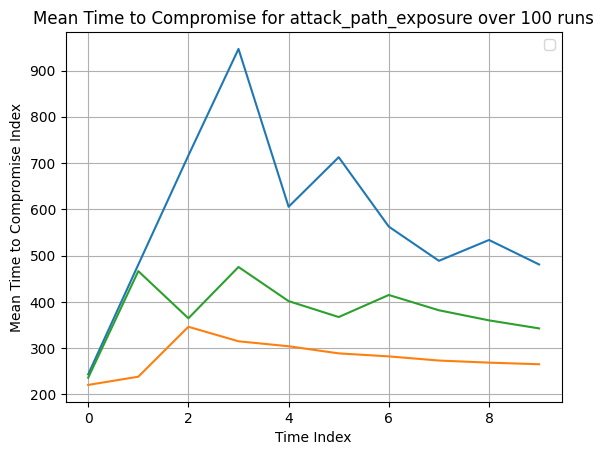

Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Static period: 0
Action: 1
MTD: CompleteTopologyShuffle triggered 0.0s
Static period: 100.45666479306277
Action: 3
MTD: CompleteTopologyShuffle triggered 100.5s
MTD: Interrupted EXPLOIT_VULN at 120.1s!
Static period: 80.40016639585096
Action: 4
MTD: CompleteTopologyShuffle triggered 200.5s
Static period: 100.15474279165042
Action: 4
MTD: CompleteTopologyShuffle triggered 300.7s
MTD: Interrupted ENUM_HOST at 321.3s!
Static period: 79.84859921619193
Action: 0
Static period: 79.84859921619193
Action: 2
MTD: CompleteTopologyShuffle triggered 401.2s
Static period: 100.54495026181621
Action: 4
MTD: CompleteTopologyShuffle triggered 501.7s
MTD: Interrupted EXPLOIT_VULN at 521.5s!
Static period: 80.63071456269847
Action: 2
MTD: CompleteTopologyShuffle triggered 602.2s
Static period: 100.06060491643291
Action: 3
MTD: IPShuffle triggered 702.2s
MT

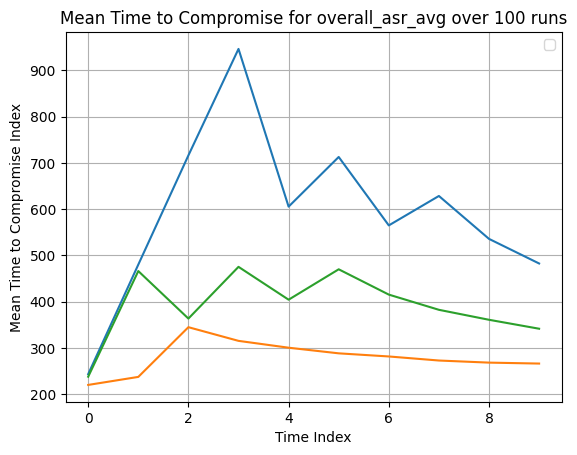

Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Static period: 0
Action: 0
Static period: 0
Action: 3
MTD: OSDiversity triggered 0.0s
Static period: 20.86652382483578
Action: 4
MTD: OSDiversity triggered 101.1s
Static period: 19.99899225327073
Action: 3
MTD: OSDiversity triggered 201.8s
Static period: 20.909655098898497
Action: 2
MTD: OSDiversity triggered 302.9s
Static period: 19.52150159493908
Action: 1
MTD: CompleteTopologyShuffle triggered 403.7s
Static period: 100.01540157777112
Action: 4
MTD: CompleteTopologyShuffle triggered 503.7s
MTD: Interrupted EXPLOIT_VULN at 523.9s!
Static period: 79.9610235628121
Action: 1
MTD: CompleteTopologyShuffle triggered 603.9s
Static period: 100.46776745835803
Action: 4
MTD: CompleteTopologyShuffle triggered 704.4s
MTD: Interrupted EXPLOIT_VULN at 725.5s!
Static period: 79.02767180803983
Action: 4
MTD: CompleteTopologyShuffle triggered 804.6s
Sta

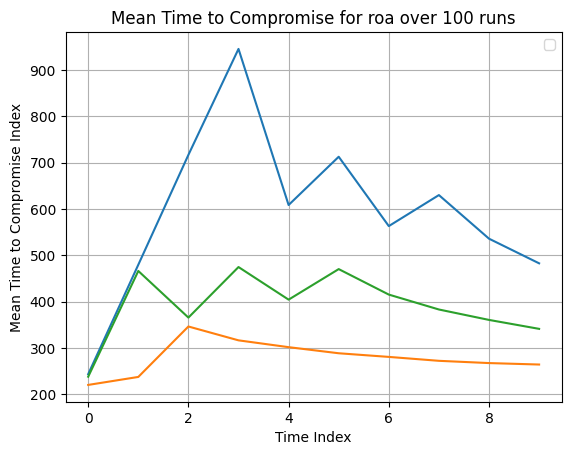

Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Static period: 0
Action: 4
MTD: ServiceDiversity triggered 0.0s
Static period: 29.583783491266317
Action: 0
Static period: 29.583783491266317
Action: 3
MTD: ServiceDiversity triggered 100.7s
Static period: 30.03476861412588
Action: 3
MTD: ServiceDiversity triggered 200.8s
Static period: 30.248264279607554
Action: 4
MTD: ServiceDiversity triggered 301.1s
Static period: 29.62197391935007
Action: 1
MTD: CompleteTopologyShuffle triggered 401.1s
Static period: 101.79360873169452
Action: 2
MTD: CompleteTopologyShuffle triggered 502.9s
MTD: Interrupted SCAN_PORT at 523.1s!
Static period: 79.91661125891403
Action: 0
Static period: 79.91661125891403
Action: 1
MTD: CompleteTopologyShuffle triggered 603.0s
Static period: 100.0161289911963
Action: 1
MTD: CompleteTopologyShuffle triggered 703.0s
MTD: Interrupted BRUTE_FORCE at 723.1s!
Static period: 

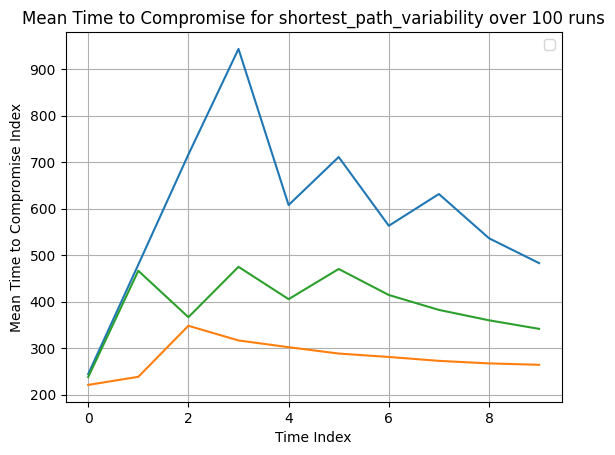

Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.
Static period: 0
Action: 2
MTD: IPShuffle triggered 0.0s
Static period: 101.2587639200624
Action: 4
MTD: IPShuffle triggered 101.3s
MTD: Interrupted EXPLOIT_VULN at 110.6s!
Static period: 91.17759228726185
Action: 4
MTD: IPShuffle triggered 201.7s
Static period: 100.23982171447392
Action: 1
MTD: IPShuffle triggered 302.0s
MTD: Interrupted EXPLOIT_VULN at 312.4s!
Static period: 89.8169267642727
Action: 0
Static period: 89.8169267642727
Action: 1
MTD: IPShuffle triggered 402.2s
Static period: 100.90719523675062
Action: 1
MTD: IPShuffle triggered 503.1s
MTD: Interrupted EXPLOIT_VULN at 512.3s!
Static period: 91.23100550146205
Action: 4
MTD: IPShuffle triggered 603.5s
Static period: 100.73526151056717
Action: 3
MTD: ServiceDiversity triggered 704.2s
MTD: Interrupted EXPLOIT_VULN at 713.7s!
Static period: 29.797183832355586
Action: 4
MTD: Ser

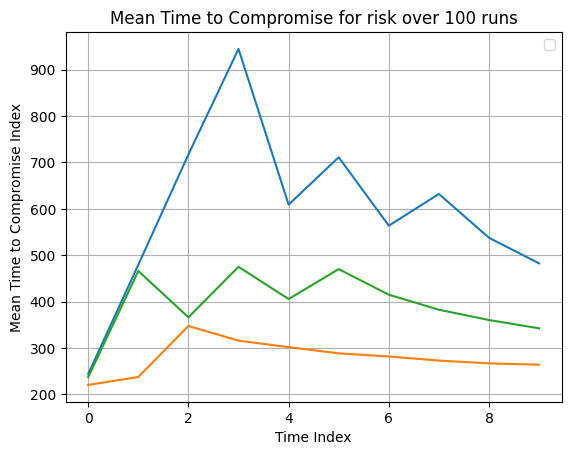

In [14]:
# Initialize an empty DataFrame
all_runs_df = pd.DataFrame()
features = ["host_compromise_ratio", "exposed_endpoints", "attack_path_exposure",  "overall_asr_avg", "roa", "shortest_path_variability", "risk"]

for feature in features:
    model = f"main_network_final_{feature}"
    for run_index in range(1,101):
        
        evaluation = execute_ai_model(model=model, features=[feature], start_time=start_time, finish_time=finish_time, mtd_interval=mtd_interval, scheme=scheme, total_nodes=total_nodes, new_network=new_network)
        eva = pd.DataFrame(evaluation.mean_time_to_compromise_10_timestamp(run_index))
        
        # Append the data to the all_runs_df DataFrame
        all_runs_df = pd.concat([all_runs_df, eva], axis=1)

    # Filter columns that include "Mean Time to Compromise"
    mean_time_columns = all_runs_df[all_runs_df.filter(like='Mean Time to Compromise').columns]
    time_columns = all_runs_df[all_runs_df.filter(like='Time').columns]
    # Find the max value of each row
    all_runs_df['Max'] = mean_time_columns.max(axis=1)
    # Find the min value of each row
    all_runs_df['Min'] = mean_time_columns.min(axis=1)
    # Find the median value of each row
    all_runs_df['Median'] = mean_time_columns.median(axis=1)
    # Calculate 75th percentile (top 25%) and 25th percentile (bottom 25%)
    all_runs_df['75th Percentile'] = mean_time_columns.quantile(0.75, axis=1)
    all_runs_df['25th Percentile'] = mean_time_columns.quantile(0.25, axis=1)

    # Plot
    plt.plot(all_runs_df['75th Percentile'])
    plt.plot(all_runs_df['25th Percentile'])
    plt.plot(all_runs_df['Median'])
    plt.ylabel('Mean Time to Compromise Index')
    plt.xlabel('Time Index')
    plt.title(f'Mean Time to Compromise for {feature} over 100 runs')
    plt.grid(True)
    plt.legend()
    plt.show()

